In [5]:
import pandas as pd
import numpy as np
import math

In [6]:
#Loading the dataset
dataset = open("breast-cancer.data")
df = []
list_for_pop = []
for data in dataset:
    df.append([data])
for i in range(len(df)):
    df[i]= df[i][0].split()
    df[i]= df[i][0].split(",")
    for j in range(len(df[i])):
        if(df[i][j].isalnum()):
            df[i][j] = np.float(df[i][j])
        else:
            list_for_pop.append(df[i][0]) 
for pp in list_for_pop:
    for i in range(len(df)):
        if(df[i][0] == pp):
            df.pop(i)
            break
df = pd.DataFrame(df)
df = df.drop_duplicates()

In [7]:
#Creating training, cross validation and test set from dataset
train = df.sample(math.ceil(60/100*len(df)))
test = df[~df.apply(tuple,1).isin(train.apply(tuple,1))].sample(math.ceil(40/100*len(df)))

In [154]:
#training data labelled
x_train = train.loc[:, range(0,10)]
y_train = train.loc[:, (0,10)]

In [155]:
#test data labelled
x_test = test.loc[:, range(0,10)]
y_test = test.loc[:, (0,10)]

In [156]:
for i in range(1,10):
    x_train[i] = (x_train[i] - min(x_train[i]))/(max(x_train[i])-min(x_train[i]))

In [12]:
def knn(train,test,k):
    x_train = train.loc[:, range(0,10)]
    y_train = train.loc[:, (0,10)]
    x_test = test.loc[:, range(0,10)]
    y_test = test.loc[:, (0,10)]
    correct = 0
    total = 0
    for i in range(1,10):
        x_train[i] = (x_train[i] - min(x_train[i]))/(max(x_train[i])-min(x_train[i]))
    for test_data_point in x_test.index:
        new_data = x_test.loc[test_data_point]
        for i in range(1,10):
            new_data[i] = np.float(new_data[i] - 1)/9.0
        list_distance = []
        for data_point in x_train.index:
            distance = 0
            for d in x_train.loc[data_point][1:10] - new_data[1:10]:
                distance = distance + d*d
            list_distance.append([distance,x_train.loc[data_point][0]])
        list_distance.sort()
        list_distance = list_distance[:k]
        y_value = []
        for i in range(len(list_distance)):
            for data_point in y_train.index:
                if(y_train.loc[data_point][0] == list_distance[i][1]):
                    y_value.append([y_train.loc[data_point][10],list_distance[i][0]])
                    break
        if([value[0] for value in y_value].count(4.0) > [value[0] for value in y_value].count(2.0)):
            pred = 4.0
        else:
            pred = 2.0
        if(pred == y_test.loc[test_data_point][10]):
            correct = correct + 1
        total = total + 1
    return (correct/total)

In [16]:
#k-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, shuffle=True)
kf.get_n_splits(df)
accuracy_list = []
for train_index,test_index in kf.split(df):
    df = df.sample(frac=1)
    train, test = df.iloc[train_index], df.iloc[test_index]
    acc = knn(train,test,10)*100
    print("Accuracy----> ",acc)
    accuracy_list.append(acc)

Accuracy---->  97.34513274336283
Accuracy---->  98.23008849557522
Accuracy---->  98.23008849557522
Accuracy---->  94.64285714285714
Accuracy---->  98.21428571428571
Accuracy---->  96.42857142857143


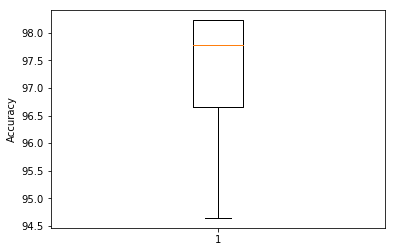

Mean accuracy 97.18183733670458


In [18]:
from matplotlib import pyplot as plt
plt.boxplot(accuracy_list)
plt.ylabel("Accuracy")
plt.show()
print("Mean accuracy",np.mean(accuracy_list))